In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import hyp2f1
from density import density
from calculate_rp import get_sr
import pandas as pd
from multiprocessing import Pool

In [2]:
#h = 10300

g = 9.8065
L0 = 24.06031 * g

wp = 0.229158

rp_max = 6.122831
l = 2 * hyp2f1(1/4, 1/2, 5/4, 1) * rp_max
ds = 0.002

In [3]:
def b(h):
    ro_atm = density(h)[0]
    ro_gas = density(h)[1]
    b = (ro_atm - ro_gas) * g 
    return b

In [4]:
from scipy.interpolate import interp1d
rs, s_half = get_sr(rp_max)
f = interp1d(s_half, rs, kind='cubic')

In [5]:
from scipy.integrate import solve_ivp


def Solve(theta0, a, h):  
    def func(t, y):
        if t <= l / 2:
            rp = f(t)
        else:
            rp = f(l - t)   
        theta, T, z, r = y
        p = b(h) * (z - a)
        sin = np.sin(theta)
        cos = np.cos(theta)
        return [
            - 2 * np.pi * (rp * wp * sin + p * r) / T,
            2 * np.pi * rp * wp * cos,
            cos,
            sin
        ]

    T0 = L0 / np.cos(theta0)
    z0, r0 = 0, 0

    sol = solve_ivp(func, t_span=[0, l], y0=[theta0, T0, z0, r0], t_eval=np.arange(0, l, ds))
    
    return sol.y, sol.t

In [19]:
def get_grid(theta_max, a_min, step_theta, step_a):
    grid = []
    for i in np.arange(np.radians(theta_max), np.radians(0), - np.radians(step_theta)):
        for j in np.arange(10, a_min, -step_a):
            grid.append([np.degrees(i), j])
    return grid

In [20]:
theta_max = 90
a_min = 0
step_theta = 0.1
step_a = 0.5

grid = get_grid(theta_max, a_min, step_theta, step_a)

In [16]:
def GridSearch(grid, h):
    optimal_z, optimal_r, theta0, loss_min = [], [], 90, 100
    for i in grid:
        theta, T, z, r = Solve(i[0], i[1], h)[0]
        if  -99 < np.degrees(theta[-1]) < -81 and -0.1 < r[-1] < 0.1:
            loss = np.sqrt(((np.pi / 2 + theta[-1]) / (np.pi / 2)) ** 2 + r[-1]**2)
            print(loss)
            if loss < loss_min:
                loss_min = loss
                optimal_z = z
                optimal_r = r
                theta0 = np.degrees(i)
        
    return [optimal_z, optimal_r, theta0, loss_min]

Height:  19000 Loss:  10 Theta0:  90


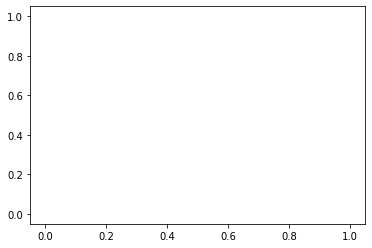

In [17]:
z, r, theta0, loss = GridSearch(grid, 19000)
print("Height: ", 19000, "Loss: ", loss, "Theta0: ", theta0)
plt.plot(z, r)
plt.show()

In [23]:
for i in grid:
    print(i[0])
    print(i[1])

90.0
10.0
90.0
9.5
90.0
9.0
90.0
8.5
90.0
8.0
90.0
7.5
90.0
7.0
90.0
6.5
90.0
6.0
90.0
5.5
90.0
5.0
90.0
4.5
90.0
4.0
90.0
3.5
90.0
3.0
90.0
2.5
90.0
2.0
90.0
1.5
90.0
1.0
90.0
0.5
89.9
10.0
89.9
9.5
89.9
9.0
89.9
8.5
89.9
8.0
89.9
7.5
89.9
7.0
89.9
6.5
89.9
6.0
89.9
5.5
89.9
5.0
89.9
4.5
89.9
4.0
89.9
3.5
89.9
3.0
89.9
2.5
89.9
2.0
89.9
1.5
89.9
1.0
89.9
0.5
89.80000000000001
10.0
89.80000000000001
9.5
89.80000000000001
9.0
89.80000000000001
8.5
89.80000000000001
8.0
89.80000000000001
7.5
89.80000000000001
7.0
89.80000000000001
6.5
89.80000000000001
6.0
89.80000000000001
5.5
89.80000000000001
5.0
89.80000000000001
4.5
89.80000000000001
4.0
89.80000000000001
3.5
89.80000000000001
3.0
89.80000000000001
2.5
89.80000000000001
2.0
89.80000000000001
1.5
89.80000000000001
1.0
89.80000000000001
0.5
89.70000000000002
10.0
89.70000000000002
9.5
89.70000000000002
9.0
89.70000000000002
8.5
89.70000000000002
8.0
89.70000000000002
7.5
89.70000000000002
7.0
89.70000000000002
6.5
89.70000000000002
6.

84.80000000000032
6.5
84.80000000000032
6.0
84.80000000000032
5.5
84.80000000000032
5.0
84.80000000000032
4.5
84.80000000000032
4.0
84.80000000000032
3.5
84.80000000000032
3.0
84.80000000000032
2.5
84.80000000000032
2.0
84.80000000000032
1.5
84.80000000000032
1.0
84.80000000000032
0.5
84.70000000000033
10.0
84.70000000000033
9.5
84.70000000000033
9.0
84.70000000000033
8.5
84.70000000000033
8.0
84.70000000000033
7.5
84.70000000000033
7.0
84.70000000000033
6.5
84.70000000000033
6.0
84.70000000000033
5.5
84.70000000000033
5.0
84.70000000000033
4.5
84.70000000000033
4.0
84.70000000000033
3.5
84.70000000000033
3.0
84.70000000000033
2.5
84.70000000000033
2.0
84.70000000000033
1.5
84.70000000000033
1.0
84.70000000000033
0.5
84.60000000000034
10.0
84.60000000000034
9.5
84.60000000000034
9.0
84.60000000000034
8.5
84.60000000000034
8.0
84.60000000000034
7.5
84.60000000000034
7.0
84.60000000000034
6.5
84.60000000000034
6.0
84.60000000000034
5.5
84.60000000000034
5.0
84.60000000000034
4.5
84.60000

81.00000000000055
8.0
81.00000000000055
7.5
81.00000000000055
7.0
81.00000000000055
6.5
81.00000000000055
6.0
81.00000000000055
5.5
81.00000000000055
5.0
81.00000000000055
4.5
81.00000000000055
4.0
81.00000000000055
3.5
81.00000000000055
3.0
81.00000000000055
2.5
81.00000000000055
2.0
81.00000000000055
1.5
81.00000000000055
1.0
81.00000000000055
0.5
80.90000000000056
10.0
80.90000000000056
9.5
80.90000000000056
9.0
80.90000000000056
8.5
80.90000000000056
8.0
80.90000000000056
7.5
80.90000000000056
7.0
80.90000000000056
6.5
80.90000000000056
6.0
80.90000000000056
5.5
80.90000000000056
5.0
80.90000000000056
4.5
80.90000000000056
4.0
80.90000000000056
3.5
80.90000000000056
3.0
80.90000000000056
2.5
80.90000000000056
2.0
80.90000000000056
1.5
80.90000000000056
1.0
80.90000000000056
0.5
80.80000000000057
10.0
80.80000000000057
9.5
80.80000000000057
9.0
80.80000000000057
8.5
80.80000000000057
8.0
80.80000000000057
7.5
80.80000000000057
7.0
80.80000000000057
6.5
80.80000000000057
6.0
80.80000

75.5000000000009
7.0
75.5000000000009
6.5
75.5000000000009
6.0
75.5000000000009
5.5
75.5000000000009
5.0
75.5000000000009
4.5
75.5000000000009
4.0
75.5000000000009
3.5
75.5000000000009
3.0
75.5000000000009
2.5
75.5000000000009
2.0
75.5000000000009
1.5
75.5000000000009
1.0
75.5000000000009
0.5
75.4000000000009
10.0
75.4000000000009
9.5
75.4000000000009
9.0
75.4000000000009
8.5
75.4000000000009
8.0
75.4000000000009
7.5
75.4000000000009
7.0
75.4000000000009
6.5
75.4000000000009
6.0
75.4000000000009
5.5
75.4000000000009
5.0
75.4000000000009
4.5
75.4000000000009
4.0
75.4000000000009
3.5
75.4000000000009
3.0
75.4000000000009
2.5
75.4000000000009
2.0
75.4000000000009
1.5
75.4000000000009
1.0
75.4000000000009
0.5
75.30000000000092
10.0
75.30000000000092
9.5
75.30000000000092
9.0
75.30000000000092
8.5
75.30000000000092
8.0
75.30000000000092
7.5
75.30000000000092
7.0
75.30000000000092
6.5
75.30000000000092
6.0
75.30000000000092
5.5
75.30000000000092
5.0
75.30000000000092
4.5
75.30000000000092
4.

71.70000000000114
9.5
71.70000000000114
9.0
71.70000000000114
8.5
71.70000000000114
8.0
71.70000000000114
7.5
71.70000000000114
7.0
71.70000000000114
6.5
71.70000000000114
6.0
71.70000000000114
5.5
71.70000000000114
5.0
71.70000000000114
4.5
71.70000000000114
4.0
71.70000000000114
3.5
71.70000000000114
3.0
71.70000000000114
2.5
71.70000000000114
2.0
71.70000000000114
1.5
71.70000000000114
1.0
71.70000000000114
0.5
71.60000000000115
10.0
71.60000000000115
9.5
71.60000000000115
9.0
71.60000000000115
8.5
71.60000000000115
8.0
71.60000000000115
7.5
71.60000000000115
7.0
71.60000000000115
6.5
71.60000000000115
6.0
71.60000000000115
5.5
71.60000000000115
5.0
71.60000000000115
4.5
71.60000000000115
4.0
71.60000000000115
3.5
71.60000000000115
3.0
71.60000000000115
2.5
71.60000000000115
2.0
71.60000000000115
1.5
71.60000000000115
1.0
71.60000000000115
0.5
71.50000000000115
10.0
71.50000000000115
9.5
71.50000000000115
9.0
71.50000000000115
8.5
71.50000000000115
8.0
71.50000000000115
7.5
71.50000

0.5
67.80000000000138
10.0
67.80000000000138
9.5
67.80000000000138
9.0
67.80000000000138
8.5
67.80000000000138
8.0
67.80000000000138
7.5
67.80000000000138
7.0
67.80000000000138
6.5
67.80000000000138
6.0
67.80000000000138
5.5
67.80000000000138
5.0
67.80000000000138
4.5
67.80000000000138
4.0
67.80000000000138
3.5
67.80000000000138
3.0
67.80000000000138
2.5
67.80000000000138
2.0
67.80000000000138
1.5
67.80000000000138
1.0
67.80000000000138
0.5
67.70000000000138
10.0
67.70000000000138
9.5
67.70000000000138
9.0
67.70000000000138
8.5
67.70000000000138
8.0
67.70000000000138
7.5
67.70000000000138
7.0
67.70000000000138
6.5
67.70000000000138
6.0
67.70000000000138
5.5
67.70000000000138
5.0
67.70000000000138
4.5
67.70000000000138
4.0
67.70000000000138
3.5
67.70000000000138
3.0
67.70000000000138
2.5
67.70000000000138
2.0
67.70000000000138
1.5
67.70000000000138
1.0
67.70000000000138
0.5
67.60000000000139
10.0
67.60000000000139
9.5
67.60000000000139
9.0
67.60000000000139
8.5
67.60000000000139
8.0
67.

10.0
63.900000000001626
9.5
63.900000000001626
9.0
63.900000000001626
8.5
63.900000000001626
8.0
63.900000000001626
7.5
63.900000000001626
7.0
63.900000000001626
6.5
63.900000000001626
6.0
63.900000000001626
5.5
63.900000000001626
5.0
63.900000000001626
4.5
63.900000000001626
4.0
63.900000000001626
3.5
63.900000000001626
3.0
63.900000000001626
2.5
63.900000000001626
2.0
63.900000000001626
1.5
63.900000000001626
1.0
63.900000000001626
0.5
63.80000000000163
10.0
63.80000000000163
9.5
63.80000000000163
9.0
63.80000000000163
8.5
63.80000000000163
8.0
63.80000000000163
7.5
63.80000000000163
7.0
63.80000000000163
6.5
63.80000000000163
6.0
63.80000000000163
5.5
63.80000000000163
5.0
63.80000000000163
4.5
63.80000000000163
4.0
63.80000000000163
3.5
63.80000000000163
3.0
63.80000000000163
2.5
63.80000000000163
2.0
63.80000000000163
1.5
63.80000000000163
1.0
63.80000000000163
0.5
63.70000000000164
10.0
63.70000000000164
9.5
63.70000000000164
9.0
63.70000000000164
8.5
63.70000000000164
8.0
63.700

0.5
59.5000000000019
10.0
59.5000000000019
9.5
59.5000000000019
9.0
59.5000000000019
8.5
59.5000000000019
8.0
59.5000000000019
7.5
59.5000000000019
7.0
59.5000000000019
6.5
59.5000000000019
6.0
59.5000000000019
5.5
59.5000000000019
5.0
59.5000000000019
4.5
59.5000000000019
4.0
59.5000000000019
3.5
59.5000000000019
3.0
59.5000000000019
2.5
59.5000000000019
2.0
59.5000000000019
1.5
59.5000000000019
1.0
59.5000000000019
0.5
59.4000000000019
10.0
59.4000000000019
9.5
59.4000000000019
9.0
59.4000000000019
8.5
59.4000000000019
8.0
59.4000000000019
7.5
59.4000000000019
7.0
59.4000000000019
6.5
59.4000000000019
6.0
59.4000000000019
5.5
59.4000000000019
5.0
59.4000000000019
4.5
59.4000000000019
4.0
59.4000000000019
3.5
59.4000000000019
3.0
59.4000000000019
2.5
59.4000000000019
2.0
59.4000000000019
1.5
59.4000000000019
1.0
59.4000000000019
0.5
59.30000000000191
10.0
59.30000000000191
9.5
59.30000000000191
9.0
59.30000000000191
8.5
59.30000000000191
8.0
59.30000000000191
7.5
59.30000000000191
7.0

56.10000000000211
5.5
56.10000000000211
5.0
56.10000000000211
4.5
56.10000000000211
4.0
56.10000000000211
3.5
56.10000000000211
3.0
56.10000000000211
2.5
56.10000000000211
2.0
56.10000000000211
1.5
56.10000000000211
1.0
56.10000000000211
0.5
56.00000000000212
10.0
56.00000000000212
9.5
56.00000000000212
9.0
56.00000000000212
8.5
56.00000000000212
8.0
56.00000000000212
7.5
56.00000000000212
7.0
56.00000000000212
6.5
56.00000000000212
6.0
56.00000000000212
5.5
56.00000000000212
5.0
56.00000000000212
4.5
56.00000000000212
4.0
56.00000000000212
3.5
56.00000000000212
3.0
56.00000000000212
2.5
56.00000000000212
2.0
56.00000000000212
1.5
56.00000000000212
1.0
56.00000000000212
0.5
55.90000000000212
10.0
55.90000000000212
9.5
55.90000000000212
9.0
55.90000000000212
8.5
55.90000000000212
8.0
55.90000000000212
7.5
55.90000000000212
7.0
55.90000000000212
6.5
55.90000000000212
6.0
55.90000000000212
5.5
55.90000000000212
5.0
55.90000000000212
4.5
55.90000000000212
4.0
55.90000000000212
3.5
55.90000

52.10000000000236
0.5
52.000000000002366
10.0
52.000000000002366
9.5
52.000000000002366
9.0
52.000000000002366
8.5
52.000000000002366
8.0
52.000000000002366
7.5
52.000000000002366
7.0
52.000000000002366
6.5
52.000000000002366
6.0
52.000000000002366
5.5
52.000000000002366
5.0
52.000000000002366
4.5
52.000000000002366
4.0
52.000000000002366
3.5
52.000000000002366
3.0
52.000000000002366
2.5
52.000000000002366
2.0
52.000000000002366
1.5
52.000000000002366
1.0
52.000000000002366
0.5
51.90000000000237
10.0
51.90000000000237
9.5
51.90000000000237
9.0
51.90000000000237
8.5
51.90000000000237
8.0
51.90000000000237
7.5
51.90000000000237
7.0
51.90000000000237
6.5
51.90000000000237
6.0
51.90000000000237
5.5
51.90000000000237
5.0
51.90000000000237
4.5
51.90000000000237
4.0
51.90000000000237
3.5
51.90000000000237
3.0
51.90000000000237
2.5
51.90000000000237
2.0
51.90000000000237
1.5
51.90000000000237
1.0
51.90000000000237
0.5
51.80000000000238
10.0
51.80000000000238
9.5
51.80000000000238
9.0
51.800000

10.0
47.50000000000264
9.5
47.50000000000264
9.0
47.50000000000264
8.5
47.50000000000264
8.0
47.50000000000264
7.5
47.50000000000264
7.0
47.50000000000264
6.5
47.50000000000264
6.0
47.50000000000264
5.5
47.50000000000264
5.0
47.50000000000264
4.5
47.50000000000264
4.0
47.50000000000264
3.5
47.50000000000264
3.0
47.50000000000264
2.5
47.50000000000264
2.0
47.50000000000264
1.5
47.50000000000264
1.0
47.50000000000264
0.5
47.40000000000265
10.0
47.40000000000265
9.5
47.40000000000265
9.0
47.40000000000265
8.5
47.40000000000265
8.0
47.40000000000265
7.5
47.40000000000265
7.0
47.40000000000265
6.5
47.40000000000265
6.0
47.40000000000265
5.5
47.40000000000265
5.0
47.40000000000265
4.5
47.40000000000265
4.0
47.40000000000265
3.5
47.40000000000265
3.0
47.40000000000265
2.5
47.40000000000265
2.0
47.40000000000265
1.5
47.40000000000265
1.0
47.40000000000265
0.5
47.300000000002655
10.0
47.300000000002655
9.5
47.300000000002655
9.0
47.300000000002655
8.5
47.300000000002655
8.0
47.300000000002655
7

43.4000000000029
1.0
43.4000000000029
0.5
43.3000000000029
10.0
43.3000000000029
9.5
43.3000000000029
9.0
43.3000000000029
8.5
43.3000000000029
8.0
43.3000000000029
7.5
43.3000000000029
7.0
43.3000000000029
6.5
43.3000000000029
6.0
43.3000000000029
5.5
43.3000000000029
5.0
43.3000000000029
4.5
43.3000000000029
4.0
43.3000000000029
3.5
43.3000000000029
3.0
43.3000000000029
2.5
43.3000000000029
2.0
43.3000000000029
1.5
43.3000000000029
1.0
43.3000000000029
0.5
43.20000000000291
10.0
43.20000000000291
9.5
43.20000000000291
9.0
43.20000000000291
8.5
43.20000000000291
8.0
43.20000000000291
7.5
43.20000000000291
7.0
43.20000000000291
6.5
43.20000000000291
6.0
43.20000000000291
5.5
43.20000000000291
5.0
43.20000000000291
4.5
43.20000000000291
4.0
43.20000000000291
3.5
43.20000000000291
3.0
43.20000000000291
2.5
43.20000000000291
2.0
43.20000000000291
1.5
43.20000000000291
1.0
43.20000000000291
0.5
43.100000000002915
10.0
43.100000000002915
9.5
43.100000000002915
9.0
43.100000000002915
8.5
43.

7.0
39.50000000000314
6.5
39.50000000000314
6.0
39.50000000000314
5.5
39.50000000000314
5.0
39.50000000000314
4.5
39.50000000000314
4.0
39.50000000000314
3.5
39.50000000000314
3.0
39.50000000000314
2.5
39.50000000000314
2.0
39.50000000000314
1.5
39.50000000000314
1.0
39.50000000000314
0.5
39.400000000003146
10.0
39.400000000003146
9.5
39.400000000003146
9.0
39.400000000003146
8.5
39.400000000003146
8.0
39.400000000003146
7.5
39.400000000003146
7.0
39.400000000003146
6.5
39.400000000003146
6.0
39.400000000003146
5.5
39.400000000003146
5.0
39.400000000003146
4.5
39.400000000003146
4.0
39.400000000003146
3.5
39.400000000003146
3.0
39.400000000003146
2.5
39.400000000003146
2.0
39.400000000003146
1.5
39.400000000003146
1.0
39.400000000003146
0.5
39.30000000000315
10.0
39.30000000000315
9.5
39.30000000000315
9.0
39.30000000000315
8.5
39.30000000000315
8.0
39.30000000000315
7.5
39.30000000000315
7.0
39.30000000000315
6.5
39.30000000000315
6.0
39.30000000000315
5.5
39.30000000000315
5.0
39.300

35.90000000000337
1.5
35.90000000000337
1.0
35.90000000000337
0.5
35.80000000000337
10.0
35.80000000000337
9.5
35.80000000000337
9.0
35.80000000000337
8.5
35.80000000000337
8.0
35.80000000000337
7.5
35.80000000000337
7.0
35.80000000000337
6.5
35.80000000000337
6.0
35.80000000000337
5.5
35.80000000000337
5.0
35.80000000000337
4.5
35.80000000000337
4.0
35.80000000000337
3.5
35.80000000000337
3.0
35.80000000000337
2.5
35.80000000000337
2.0
35.80000000000337
1.5
35.80000000000337
1.0
35.80000000000337
0.5
35.70000000000338
10.0
35.70000000000338
9.5
35.70000000000338
9.0
35.70000000000338
8.5
35.70000000000338
8.0
35.70000000000338
7.5
35.70000000000338
7.0
35.70000000000338
6.5
35.70000000000338
6.0
35.70000000000338
5.5
35.70000000000338
5.0
35.70000000000338
4.5
35.70000000000338
4.0
35.70000000000338
3.5
35.70000000000338
3.0
35.70000000000338
2.5
35.70000000000338
2.0
35.70000000000338
1.5
35.70000000000338
1.0
35.70000000000338
0.5
35.600000000003384
10.0
35.600000000003384
9.5
35.60

2.0
32.00000000000361
1.5
32.00000000000361
1.0
32.00000000000361
0.5
31.900000000003615
10.0
31.900000000003615
9.5
31.900000000003615
9.0
31.900000000003615
8.5
31.900000000003615
8.0
31.900000000003615
7.5
31.900000000003615
7.0
31.900000000003615
6.5
31.900000000003615
6.0
31.900000000003615
5.5
31.900000000003615
5.0
31.900000000003615
4.5
31.900000000003615
4.0
31.900000000003615
3.5
31.900000000003615
3.0
31.900000000003615
2.5
31.900000000003615
2.0
31.900000000003615
1.5
31.900000000003615
1.0
31.900000000003615
0.5
31.80000000000362
10.0
31.80000000000362
9.5
31.80000000000362
9.0
31.80000000000362
8.5
31.80000000000362
8.0
31.80000000000362
7.5
31.80000000000362
7.0
31.80000000000362
6.5
31.80000000000362
6.0
31.80000000000362
5.5
31.80000000000362
5.0
31.80000000000362
4.5
31.80000000000362
4.0
31.80000000000362
3.5
31.80000000000362
3.0
31.80000000000362
2.5
31.80000000000362
2.0
31.80000000000362
1.5
31.80000000000362
1.0
31.80000000000362
0.5
31.700000000003627
10.0
31.7

10.0
28.10000000000385
9.5
28.10000000000385
9.0
28.10000000000385
8.5
28.10000000000385
8.0
28.10000000000385
7.5
28.10000000000385
7.0
28.10000000000385
6.5
28.10000000000385
6.0
28.10000000000385
5.5
28.10000000000385
5.0
28.10000000000385
4.5
28.10000000000385
4.0
28.10000000000385
3.5
28.10000000000385
3.0
28.10000000000385
2.5
28.10000000000385
2.0
28.10000000000385
1.5
28.10000000000385
1.0
28.10000000000385
0.5
28.000000000003855
10.0
28.000000000003855
9.5
28.000000000003855
9.0
28.000000000003855
8.5
28.000000000003855
8.0
28.000000000003855
7.5
28.000000000003855
7.0
28.000000000003855
6.5
28.000000000003855
6.0
28.000000000003855
5.5
28.000000000003855
5.0
28.000000000003855
4.5
28.000000000003855
4.0
28.000000000003855
3.5
28.000000000003855
3.0
28.000000000003855
2.5
28.000000000003855
2.0
28.000000000003855
1.5
28.000000000003855
1.0
28.000000000003855
0.5
27.900000000003864
10.0
27.900000000003864
9.5
27.900000000003864
9.0
27.900000000003864
8.5
27.900000000003864
8.0


4.5
24.500000000004075
4.0
24.500000000004075
3.5
24.500000000004075
3.0
24.500000000004075
2.5
24.500000000004075
2.0
24.500000000004075
1.5
24.500000000004075
1.0
24.500000000004075
0.5
24.40000000000408
10.0
24.40000000000408
9.5
24.40000000000408
9.0
24.40000000000408
8.5
24.40000000000408
8.0
24.40000000000408
7.5
24.40000000000408
7.0
24.40000000000408
6.5
24.40000000000408
6.0
24.40000000000408
5.5
24.40000000000408
5.0
24.40000000000408
4.5
24.40000000000408
4.0
24.40000000000408
3.5
24.40000000000408
3.0
24.40000000000408
2.5
24.40000000000408
2.0
24.40000000000408
1.5
24.40000000000408
1.0
24.40000000000408
0.5
24.300000000004086
10.0
24.300000000004086
9.5
24.300000000004086
9.0
24.300000000004086
8.5
24.300000000004086
8.0
24.300000000004086
7.5
24.300000000004086
7.0
24.300000000004086
6.5
24.300000000004086
6.0
24.300000000004086
5.5
24.300000000004086
5.0
24.300000000004086
4.5
24.300000000004086
4.0
24.300000000004086
3.5
24.300000000004086
3.0
24.300000000004086
2.5
24

20.500000000004324
8.0
20.500000000004324
7.5
20.500000000004324
7.0
20.500000000004324
6.5
20.500000000004324
6.0
20.500000000004324
5.5
20.500000000004324
5.0
20.500000000004324
4.5
20.500000000004324
4.0
20.500000000004324
3.5
20.500000000004324
3.0
20.500000000004324
2.5
20.500000000004324
2.0
20.500000000004324
1.5
20.500000000004324
1.0
20.500000000004324
0.5
20.40000000000433
10.0
20.40000000000433
9.5
20.40000000000433
9.0
20.40000000000433
8.5
20.40000000000433
8.0
20.40000000000433
7.5
20.40000000000433
7.0
20.40000000000433
6.5
20.40000000000433
6.0
20.40000000000433
5.5
20.40000000000433
5.0
20.40000000000433
4.5
20.40000000000433
4.0
20.40000000000433
3.5
20.40000000000433
3.0
20.40000000000433
2.5
20.40000000000433
2.0
20.40000000000433
1.5
20.40000000000433
1.0
20.40000000000433
0.5
20.300000000004335
10.0
20.300000000004335
9.5
20.300000000004335
9.0
20.300000000004335
8.5
20.300000000004335
8.0
20.300000000004335
7.5
20.300000000004335
7.0
20.300000000004335
6.5
20.300

6.5
16.80000000000455
6.0
16.80000000000455
5.5
16.80000000000455
5.0
16.80000000000455
4.5
16.80000000000455
4.0
16.80000000000455
3.5
16.80000000000455
3.0
16.80000000000455
2.5
16.80000000000455
2.0
16.80000000000455
1.5
16.80000000000455
1.0
16.80000000000455
0.5
16.700000000004557
10.0
16.700000000004557
9.5
16.700000000004557
9.0
16.700000000004557
8.5
16.700000000004557
8.0
16.700000000004557
7.5
16.700000000004557
7.0
16.700000000004557
6.5
16.700000000004557
6.0
16.700000000004557
5.5
16.700000000004557
5.0
16.700000000004557
4.5
16.700000000004557
4.0
16.700000000004557
3.5
16.700000000004557
3.0
16.700000000004557
2.5
16.700000000004557
2.0
16.700000000004557
1.5
16.700000000004557
1.0
16.700000000004557
0.5
16.600000000004567
10.0
16.600000000004567
9.5
16.600000000004567
9.0
16.600000000004567
8.5
16.600000000004567
8.0
16.600000000004567
7.5
16.600000000004567
7.0
16.600000000004567
6.5
16.600000000004567
6.0
16.600000000004567
5.5
16.600000000004567
5.0
16.60000000000456

12.400000000004827
1.0
12.400000000004827
0.5
12.300000000004832
10.0
12.300000000004832
9.5
12.300000000004832
9.0
12.300000000004832
8.5
12.300000000004832
8.0
12.300000000004832
7.5
12.300000000004832
7.0
12.300000000004832
6.5
12.300000000004832
6.0
12.300000000004832
5.5
12.300000000004832
5.0
12.300000000004832
4.5
12.300000000004832
4.0
12.300000000004832
3.5
12.300000000004832
3.0
12.300000000004832
2.5
12.300000000004832
2.0
12.300000000004832
1.5
12.300000000004832
1.0
12.300000000004832
0.5
12.200000000004838
10.0
12.200000000004838
9.5
12.200000000004838
9.0
12.200000000004838
8.5
12.200000000004838
8.0
12.200000000004838
7.5
12.200000000004838
7.0
12.200000000004838
6.5
12.200000000004838
6.0
12.200000000004838
5.5
12.200000000004838
5.0
12.200000000004838
4.5
12.200000000004838
4.0
12.200000000004838
3.5
12.200000000004838
3.0
12.200000000004838
2.5
12.200000000004838
2.0
12.200000000004838
1.5
12.200000000004838
1.0
12.200000000004838
0.5
12.100000000004846
10.0
12.10000

8.800000000005051
9.0
8.800000000005051
8.5
8.800000000005051
8.0
8.800000000005051
7.5
8.800000000005051
7.0
8.800000000005051
6.5
8.800000000005051
6.0
8.800000000005051
5.5
8.800000000005051
5.0
8.800000000005051
4.5
8.800000000005051
4.0
8.800000000005051
3.5
8.800000000005051
3.0
8.800000000005051
2.5
8.800000000005051
2.0
8.800000000005051
1.5
8.800000000005051
1.0
8.800000000005051
0.5
8.700000000005057
10.0
8.700000000005057
9.5
8.700000000005057
9.0
8.700000000005057
8.5
8.700000000005057
8.0
8.700000000005057
7.5
8.700000000005057
7.0
8.700000000005057
6.5
8.700000000005057
6.0
8.700000000005057
5.5
8.700000000005057
5.0
8.700000000005057
4.5
8.700000000005057
4.0
8.700000000005057
3.5
8.700000000005057
3.0
8.700000000005057
2.5
8.700000000005057
2.0
8.700000000005057
1.5
8.700000000005057
1.0
8.700000000005057
0.5
8.600000000005062
10.0
8.600000000005062
9.5
8.600000000005062
9.0
8.600000000005062
8.5
8.600000000005062
8.0
8.600000000005062
7.5
8.600000000005062
7.0
8.600000

7.0
5.100000000005281
6.5
5.100000000005281
6.0
5.100000000005281
5.5
5.100000000005281
5.0
5.100000000005281
4.5
5.100000000005281
4.0
5.100000000005281
3.5
5.100000000005281
3.0
5.100000000005281
2.5
5.100000000005281
2.0
5.100000000005281
1.5
5.100000000005281
1.0
5.100000000005281
0.5
5.000000000005286
10.0
5.000000000005286
9.5
5.000000000005286
9.0
5.000000000005286
8.5
5.000000000005286
8.0
5.000000000005286
7.5
5.000000000005286
7.0
5.000000000005286
6.5
5.000000000005286
6.0
5.000000000005286
5.5
5.000000000005286
5.0
5.000000000005286
4.5
5.000000000005286
4.0
5.000000000005286
3.5
5.000000000005286
3.0
5.000000000005286
2.5
5.000000000005286
2.0
5.000000000005286
1.5
5.000000000005286
1.0
5.000000000005286
0.5
4.900000000005293
10.0
4.900000000005293
9.5
4.900000000005293
9.0
4.900000000005293
8.5
4.900000000005293
8.0
4.900000000005293
7.5
4.900000000005293
7.0
4.900000000005293
6.5
4.900000000005293
6.0
4.900000000005293
5.5
4.900000000005293
5.0
4.900000000005293
4.5
4.90

3.0
1.1000000000055294
2.5
1.1000000000055294
2.0
1.1000000000055294
1.5
1.1000000000055294
1.0
1.1000000000055294
0.5
1.0000000000055356
10.0
1.0000000000055356
9.5
1.0000000000055356
9.0
1.0000000000055356
8.5
1.0000000000055356
8.0
1.0000000000055356
7.5
1.0000000000055356
7.0
1.0000000000055356
6.5
1.0000000000055356
6.0
1.0000000000055356
5.5
1.0000000000055356
5.0
1.0000000000055356
4.5
1.0000000000055356
4.0
1.0000000000055356
3.5
1.0000000000055356
3.0
1.0000000000055356
2.5
1.0000000000055356
2.0
1.0000000000055356
1.5
1.0000000000055356
1.0
1.0000000000055356
0.5
0.9000000000055418
10.0
0.9000000000055418
9.5
0.9000000000055418
9.0
0.9000000000055418
8.5
0.9000000000055418
8.0
0.9000000000055418
7.5
0.9000000000055418
7.0
0.9000000000055418
6.5
0.9000000000055418
6.0
0.9000000000055418
5.5
0.9000000000055418
5.0
0.9000000000055418
4.5
0.9000000000055418
4.0
0.9000000000055418
3.5
0.9000000000055418
3.0
0.9000000000055418
2.5
0.9000000000055418
2.0
0.9000000000055418
1.5
0.900